# LeBron James Shooting Analysis (2023 Season)

## Objective
This project analyzes LeBron James' shooting performances during the 2023 NBA season. 

We aim to:
- Visualize shot locations to identify patterns and tendencies.
- Calculate and interpret shooting accuracy trends based on distance and location.

# Step 1: Setup
Import necessary libraries and modules because we need these to access certain features such as graphs, plots, and packages from python

# Data Manipulation
we are renaming pandas and numpy as pd and np. If you don't know what they are, pandas is a python library that makes data analysis and manipulation easier to use. Numpy is a library that supports arrays and numerical computation.

In [1]:
import pandas as pd
import numpy as np

# Visualization
we are renaming seaborn as sns and matplotlib library pyplot as plt. They are both used for graphing data onto lineplots, charts, and scatterplots.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# import from classes and functions
we are importing classes to show what functions we have so far. So we are going to import functions, classes.

In [3]:
from my_module import functions as fnct
from my_module import classes as cls

To prevent using longer names and copying a url or a filename, we are gonna create a variable called file_name to assign to our csv file.

In [4]:
file_tested = "1_lebron_james_shot_chart_1_2023.csv"

# Step 3: Load the Dataset
Load the CSV file into a pandas DataFrame

In [25]:
# we are assigning df to our pandas dataframe to make typing less of a hassle.
df = pd.read_csv(file_tested)

# to show that the data has been loaded, we are gonna print a statement.
print("Data has been successfully loaded")

Data has been successfully loaded


First, let's check how many columns and rows we have in the csv file.

In [6]:
# Shape gives us the amount of rows and columns
print("(rows, columns)")
df.shape

(rows, columns)


(1533, 15)

Here, we have 1533 rows and 15 columns. Which is a lot of rows, but we can show the dataset by calling a certain function called head.

# Step 4: View the Dataset
print the dataset by calling head(). Head only shows the first 5 rows

In [7]:
df.head()

,top,left,date,qtr,time_remaining,result,shot_type,distance_ft,lead,lebron_team_score,opponent_team_score,opponent,team,season,color
0,310,203,"Oct 18, 2022",1st Qtr,09:26,False,3,26,False,2,2,GSW,LAL,2023,red
1,213,259,"Oct 18, 2022",1st Qtr,08:38,False,2,16,False,4,5,GSW,LAL,2023,red
2,143,171,"Oct 18, 2022",1st Qtr,08:10,False,2,11,False,4,7,GSW,LAL,2023,red
3,68,215,"Oct 18, 2022",1st Qtr,05:24,True,2,3,False,12,19,GSW,LAL,2023,green
4,66,470,"Oct 18, 2022",1st Qtr,01:02,False,3,23,False,22,23,GSW,LAL,2023,red


One thing about data science is to explore and clean datasets. To clean datasets, we can start by looking for missing values that are known as Null Values. One way to check for Null Values is through the function isnull(). We can also return the sum of null values by using sum(). If it equals 0 then there are no missing values.

# Step 5: Look for missing Values
We are using isnull to look for missing values to clean the dataset

In [8]:
if df.isnull().sum().sum() == 0:
    print("There are no null values")
else:
    print("There are null values in the dataset")

There are no null values


Since there are zeroes instead of Null, we have no values, hence we are printing out a statement saying "There are no null values".

Another way to clean the datasets is by checking if the rows are duplicated, which means that there is a copy of a row. We can use duplicated() which describes which rows are duplicated, and we use sum to find the amount of duplicated rows.

# Step 6: Check for duplicate rows

In [9]:
print("Number of duplicate rows:")
print(df.duplicated().sum())

Number of duplicate rows:
1


Uh, oh, we have 1 duplicated row. Don't worry, we can delete the duplicated row by using the drop_duplicates() function, we want the data to be clean when we analyze it.

# Step 7: Clean the dataset by removing Duplicate rows

In [10]:
duplicate_rows = df.duplicated().sum()

# Removing duplicates
if duplicate_rows > 0:
    df = df.drop_duplicates()
    print("Duplicate Row(s) deleted")
else:
    print("Duplicate Row not deleted")

Duplicate Row(s) deleted


One other way to clean is to rename the columns so that the person reading the code can understand it a little better. To check, we can use shape if it has truly been deleted.

In [11]:
df.shape

(1532, 15)

Ok, so now we have 1532 rows. Let's move onto renaming columns and rows if it doesn't make any sense at all.

# Step 8: Rename the columns and rows so that the name makes sense

We can start by changing True or False to say 1 if he made the basket or 0 if he missed. True or False is computer science language for yes or no, or correct and incorrect. We are using 1 because we are adding a point to see if he made the shot regardless of whether it was a two pointer, a triple pointer, or a single pointer because we are just analyzing his shooting accuracy not how many points he got.

In [12]:
df['result'] = df['result'].replace({True: 1, False: 0})

/tmp/ipykernel_12255/893899407.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['result'] = df['result'].replace({True: 1, False: 0})


This is not an error sign, this is a futurewarning, so do not worry about that. Let's check the head right now to see the new updates.

In [13]:
df.head()

,top,left,date,qtr,time_remaining,result,shot_type,distance_ft,lead,lebron_team_score,opponent_team_score,opponent,team,season,color
0,310,203,"Oct 18, 2022",1st Qtr,09:26,0,3,26,False,2,2,GSW,LAL,2023,red
1,213,259,"Oct 18, 2022",1st Qtr,08:38,0,2,16,False,4,5,GSW,LAL,2023,red
2,143,171,"Oct 18, 2022",1st Qtr,08:10,0,2,11,False,4,7,GSW,LAL,2023,red
3,68,215,"Oct 18, 2022",1st Qtr,05:24,1,2,3,False,12,19,GSW,LAL,2023,green
4,66,470,"Oct 18, 2022",1st Qtr,01:02,0,3,23,False,22,23,GSW,LAL,2023,red


Ok, from the dataset we have another set of True and False in the lead column. The lead determine whether the Lakers were ahead or behind the other team. So we should change it to behind/tied, or ahead.

In [14]:
df['lead'] = df['lead'].replace({True: 'ahead', False: 'behind/tied'})

One final way to clean the data is to delete any rows or columns that aren't necessary. An example is the colors row. We already have a column that says whether Lebron made a shot or not. Hence we are deleting the color column.

We can change a column name using the rename function, we have columns as a dictionary with color being shot made, and to update we use inplace assigned to be True so that the changes are fixed.

In [15]:
if "color" in df.columns:
    
    # We are using the rename function to take out the column
    df.rename(columns = {"color": "shot made"}, inplace = True)
    
    # we are printing this as if we succeeded in deleting
    # the column
    print("The column color has been renamed")

else:
    print("The column color has not been renamed")

The column color has been renamed


One last change we are going to do is change the colors green and red to be called 'made' or 'missed'. We can do this by changing shot made.

In [16]:
df['shot made'] = df['shot made'].replace({'green': 'made', 'red': 'missed'})

Ok, we have cleaned our data, so we are gonna preview it to see how it looks. But first, we are gonna check how many rows and columns there are.

I think we completely cleaned our datasheet. Let's go print it out.

# Step 10: Preview cleaned data

In [17]:
print("Cleaned Data Preview:")
df.head(5)

Cleaned Data Preview:


,top,left,date,qtr,time_remaining,result,shot_type,distance_ft,lead,lebron_team_score,opponent_team_score,opponent,team,season,shot made
0,310,203,"Oct 18, 2022",1st Qtr,09:26,0,3,26,behind/tied,2,2,GSW,LAL,2023,missed
1,213,259,"Oct 18, 2022",1st Qtr,08:38,0,2,16,behind/tied,4,5,GSW,LAL,2023,missed
2,143,171,"Oct 18, 2022",1st Qtr,08:10,0,2,11,behind/tied,4,7,GSW,LAL,2023,missed
3,68,215,"Oct 18, 2022",1st Qtr,05:24,1,2,3,behind/tied,12,19,GSW,LAL,2023,made
4,66,470,"Oct 18, 2022",1st Qtr,01:02,0,3,23,behind/tied,22,23,GSW,LAL,2023,missed


There we go, we have the changes and cleaned our data, now to import some functions from other files.

Since we cleaned our data, we can import classes, functions, and test functions to see if they work. Also to analyze and show our data and explain what's going on.

# Importing a class from classes.py

For starters, we are gonna analyze a column from the dataset. Let's analyze the results.

Here we are creating an object called analyzer. We are assigning analyzer to be the class ShotAnalyzer. Since ShotAnalyzer is a class, we usually don't have a parameter, but here we have df, which is short for dataframe. To access the object, we are using a . to connect that object to a method called column_analyzer. In column_analyzer, it's self explanatory, we are analyzing a column, here we are analyzing the results column which gives us the amount of rows, and the averages. 

In [18]:
# We are assigning analyzer to call a module function "column_analyzer" 
# from the class object.
analyzer = cls.ShotAnalyzer(df)

# Here we are calling the function to analyze
# the results column
analyzer.column_analyzer('result')

count    1532.000000
mean        0.501305
std         0.500162
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: result, dtype: float64

Since we just analyzed the results, it seems that the mean of Lebron James' shooting accuracy is 50.13%. 

Next, we are gonna use the class method compare_two_columns to give us a comparison.

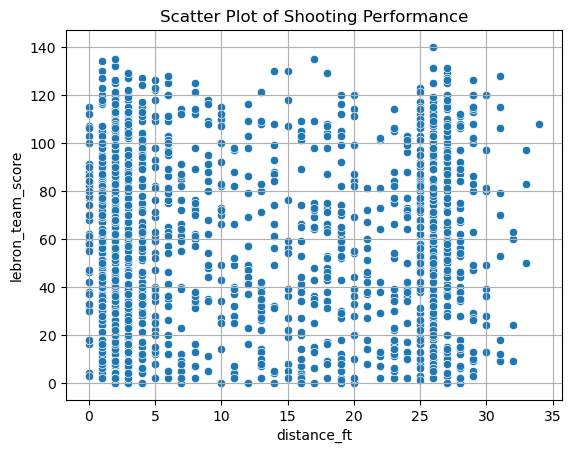

In [19]:
comparison = cls.ShotAnalyzer(df)
comparison.compare_two_columns('distance_ft', 'lebron_team_score')

Next, we are gonna use the method analyze_two_columns to check what the correlational relationship between two columns are.

In [20]:
# We are assigning correlation to call a class "ShotAnalyzer"

correlation = cls.ShotAnalyzer(df)


# Here we are printing Correlation Matrix because it's a correlational 
# relationship between the two columns
print("Correlation Matrix:")

# Here we are calling the function
correlation.analyze_two_columns('result', 'lebron_team_score')


Correlation Matrix:


,result,lebron_team_score
result,1.000000,0.009101
lebron_team_score,0.009101,1.000000


Ok, so basically we are measuring the strength of the linear relationship between result and lebron's team score to have a strong positive correlational relationship of 1.0.

Now, let's test the create line plot function, we are gonna compare the distance in feet to the amount of shots Lebron made in 2023.

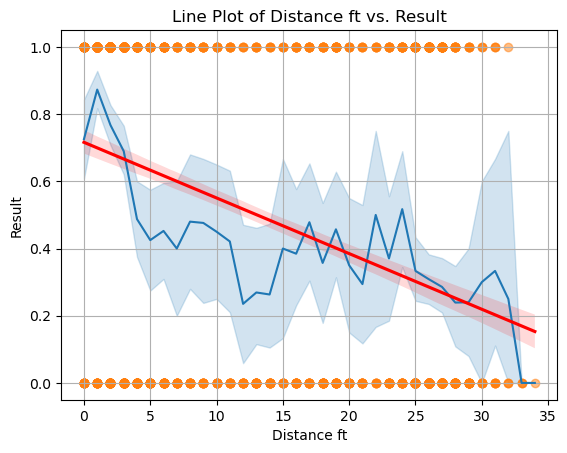

In [21]:
# Pass the raw data to the function
line_plot = cls.ShotAnalyzer(df)

line_plot.create_line_plot('distance_ft', 'result')

What an interesting result, his shots accuracy have decreased over time as his distance increases. Which means that the farther he is from the basket, the more likely his shots are going to miss. As you notice, there is also a line of best fit, I didn't want to do the equation. Now we are gonna see a visual accuracy from which Lebron made the shots.

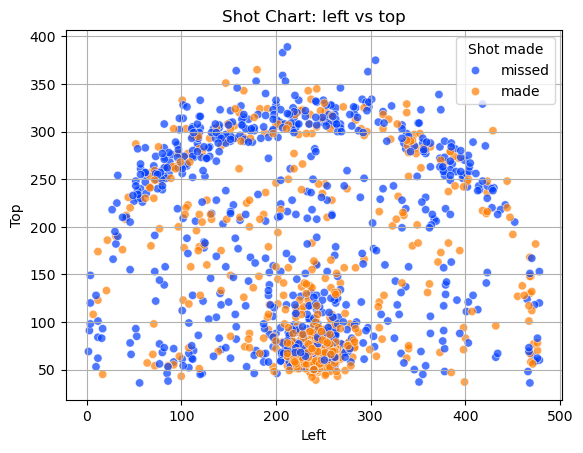

In [22]:
shooter_visualization = cls.ShotAnalyzer(df)
shooter_visualization.shot_distribution('left', 'top', 'shot made', 'bright', 0.7)

This is a cool visualization of where Lebron made the shot or missed from the 2 point, 3 point line, and close to the basket from the 2023 season overall. I noticed that he is more likely to miss the basket when he's around the 3-point line compared to the inside of the 2-point line. Overall, he's more likely to make a 2-point than a 3-point basket.

Ok, now we need to test all the functions because we are trying to make sure they work on all types of data plots and not just the one we did with Lebron. So in the test function, I made some dummy data to make sure the functions work, and I had to rename some of the names inside the function just so we analyze a normal basketball game instead of just Lebron James.

Running test: column_analyzer...
column_analyzer passed.
Running test: analyze_two_columns...
analyze_two_columns passed.
Running test: compare_two_columns...


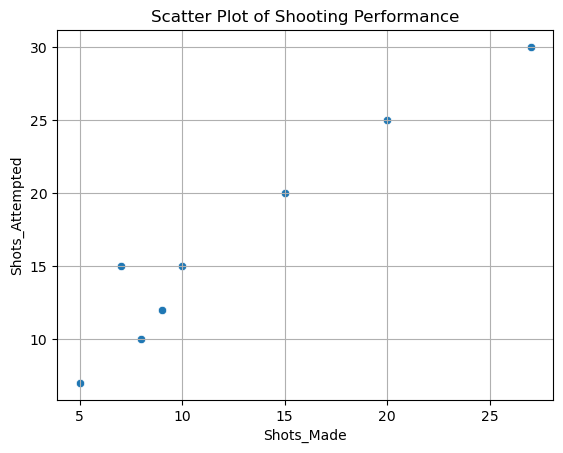

compare_two_columns passed.
Running test: create_line_plot...


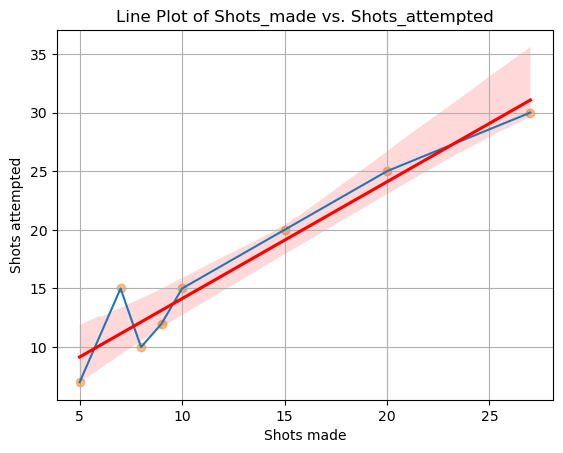

create_line_plot passed.
Running test: shot_distribution...


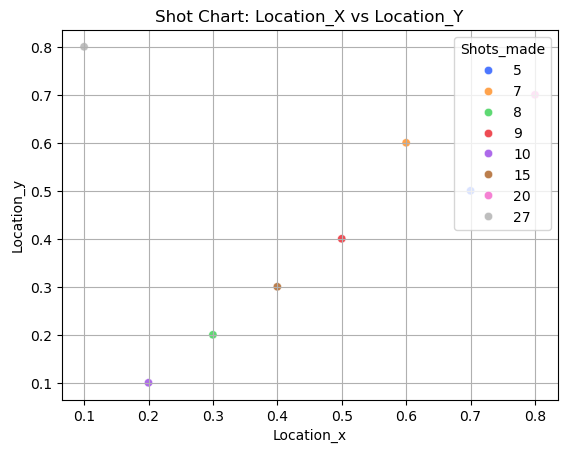

shot_distribution passed.


In [23]:
#Using a test function
from my_module import test_functions

If every test has passed, then we are good to use !pytest to validate our results. Other than that, if one of the tests fail, then we are missing something and need to go back to the test_functions. 

In [24]:
!pytest my_module

============================= test session starts ==============================
platform linux -- Python 3.11.9, pytest-8.3.3, pluggy-1.5.0
rootdir: /home/rregala/FinalProject
plugins: anyio-4.3.0
collected 1 item                                                               

my_module/test_functions.py .                                            [100%]

============================== 1 passed in 2.35s ===============================


In this project, I learned new tools such as seaborn and matplotlib. I had to use those to access them to make graphs of Lebron James's performances. This was a new experience for me because I never worked with data libraries before, and just never worked on python until this quarter. I had some prior knowledge of C++ from taking the intro class up to Data Structures. I wanted to create graphs with data so I used google and youtube to help me with this project. Overall, I learned a bit more about python from using my experiences from c++, and just knowing how to do it. Additionally, I used recursion to make the code easier to read because using a lot of code blocks can become redundant over a period of time. I also relearned pass by reference to make the code seem less redundant with calling the function over a period of time. I learned how to clean data from the TA's and IA's and use the python libraries to make sure the data is cleaned before using and showing off my skills. Overall, it was a very tough project to do, and I learned a lot from my experiences as a programmer.